# W10 Lab Assignment

Dive deeper into high dimensional data.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import manifold
from sklearn.datasets import load_digits

%matplotlib inline
sns.set_style('white')

Load the iris dataset.

In [2]:
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


We can use the [**`PairGrid()`**](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) function to create a grid of subplots to plot relations between pairs of variables. On the diagonal of the grid, we plot the KDE of each variable using the **`map_diag()`** method. And on the off-diagonal subplots, we plot 2-D KDE of pairs of variables using the **`map_offdiag()`** method.

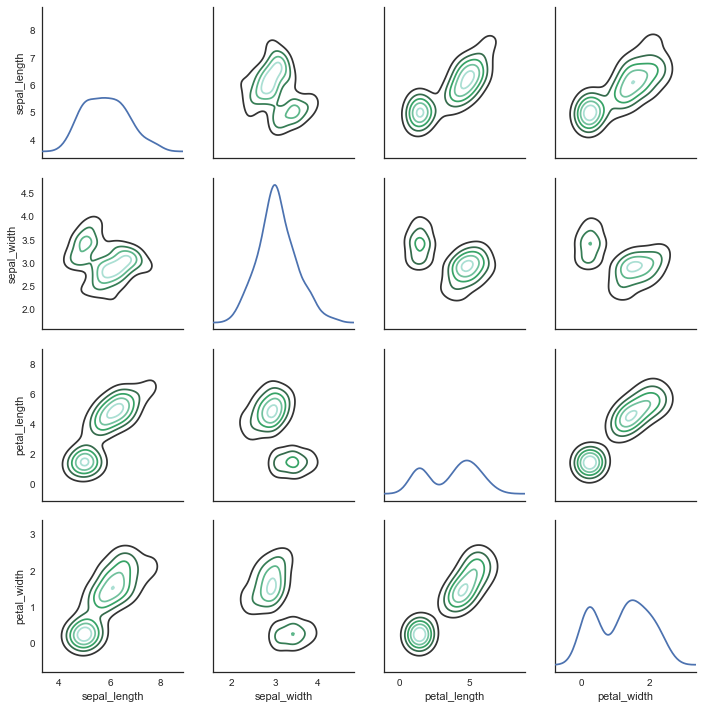

In [3]:
import warnings
warnings.filterwarnings('ignore')
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
_ = g.map_offdiag(sns.kdeplot, n_levels=5) # set the number of contour levels to 5

**TODO**: Use [**`PairGrid()`**](http://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid) to plot KDE on the diagonal; on the lower diagonal subplots, plot scatter plot between two variables; on the upper diagonal subplots, plot 2-D KDE of two variables.

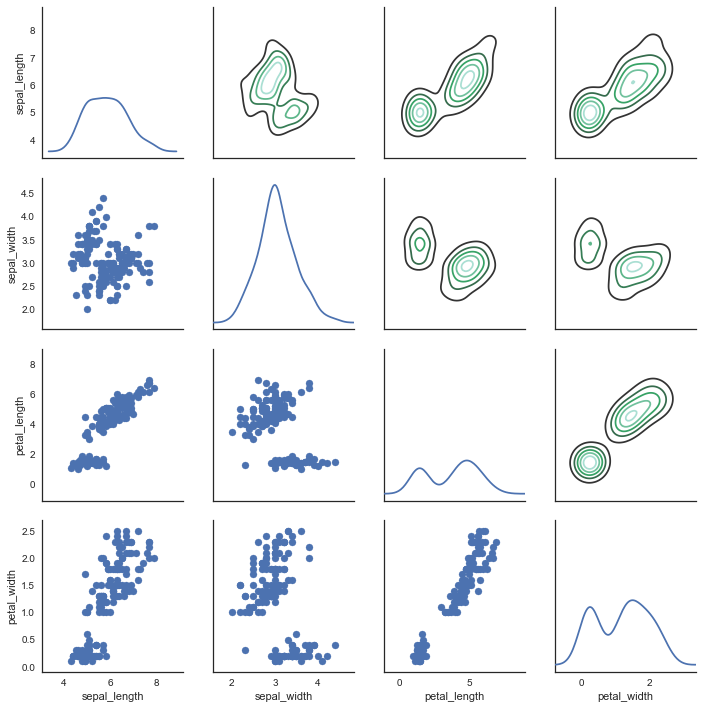

In [4]:
# TODO: on the diagonal: KDE; lower diagonal: scatter plot; upper diagonal: 2-D KDE
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_lower(plt.scatter)
_ = g.map_upper(sns.kdeplot, n_levels=5) # set the number of contour levels to 5

Parallel coordinates can be easily created using the [**`parallel_coordinates()`**](http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates) function in pandas.

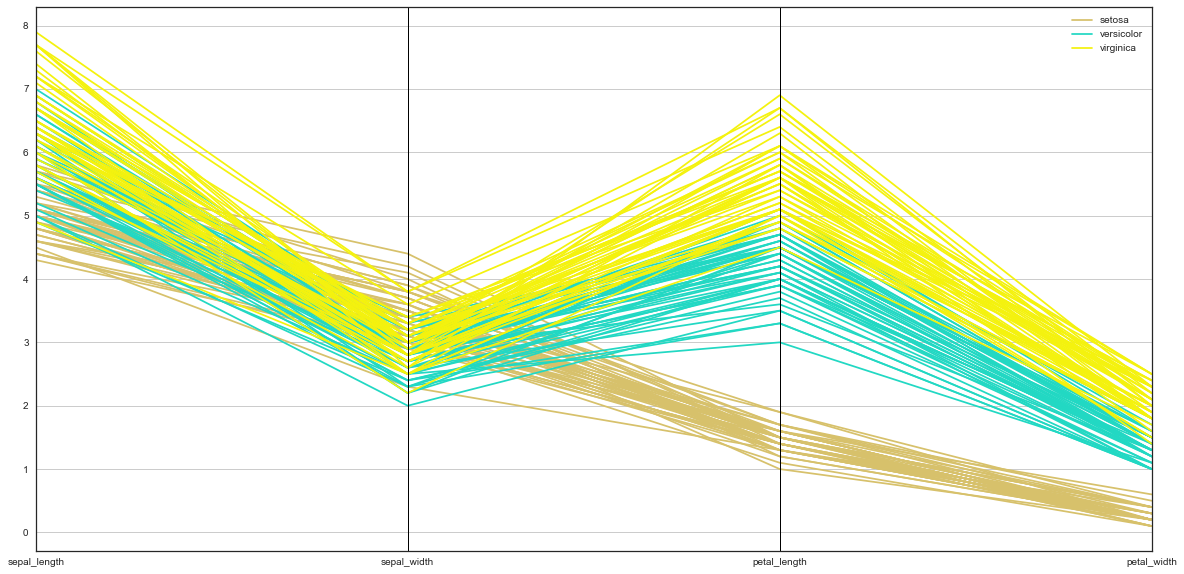

In [5]:
# TODO: draw the parallel coordinates plot with the iris data, and let it use different colors for each iris species.
from pandas.tools.plotting import parallel_coordinates
plt.figure(figsize=(20,10))
parallel_coordinates(iris,'species')

## PCA

We will be working on an image dataset called the [Olivetti faces dataset](http://scikit-learn.org/stable/datasets/olivetti_faces.html), which contains a lot of *faces*. Download the data using the [**`fetch_olivetti_faces()`**](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html) function.

In [6]:
from sklearn.datasets import fetch_olivetti_faces

dataset = fetch_olivetti_faces(shuffle=True)

Get the data:

In [7]:
faces = dataset.data

In [8]:
n_samples, n_features = faces.shape
print(n_samples)
print(n_features)

400
4096


So, this dataset contains 400 faces, and each of them has 4096 features (=pixels). Let's look at the first face:

In [9]:
faces[0]

array([ 0.66942149,  0.63636363,  0.64876032, ...,  0.08677686,
        0.08264463,  0.07438017], dtype=float32)

It's an one-dimensional array with 4096 numbers. Actually, it is a two-dimensional picture. Use `numpy`'s [**`reshape()`**](http://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) function as well as `matplotlib`'s [**`imshow()`**](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) function, transform this one-dimensional array into an appropriate 2-D matrix and draw it to show the face. You probably want to use `plt.cm.gray` as colormap. 

Be sure to play with different shapes (e.g. 2 x 2048, 1024 x 4, 128 x 32, and so on) and think about why they look like what they look like. What is the right shape of the matrix?

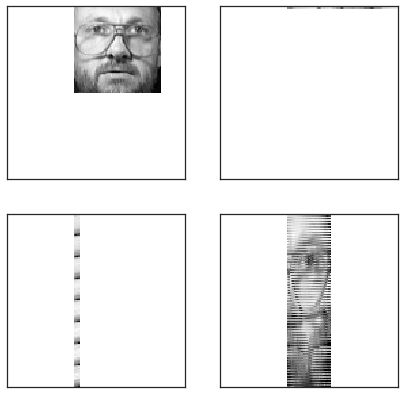

In [10]:
# TODO: draw faces[0] with various shapes and think about it. Show the correct face. 
# so, we have 400 rows, wich corresponds to 10 photos * 40 individuals per the dataset man page
# we also know that each photo is 64x64 image
fig, axes = plt.subplots(figsize=(7,7), nrows=2, ncols=2, sharey=True, sharex=True)
img_sample_shape = np.array([faces[0].reshape(64,64), faces[0].reshape(2,2048),\
                             faces[0].reshape(1024,4), faces[0].reshape(128,32)])
for ax, img in zip(axes.flatten(), img_sample_shape):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(img, cmap=plt.cm.gray)

Let's perform PCA on this dataset.

In [11]:
from sklearn.decomposition import PCA

Set the number of components to 6:

In [12]:
n_components=6
pca = PCA(n_components=n_components)

Fit the faces data:

In [13]:
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA has an attribute called `components_`. It is a $\text{n_components} \times \text{n_features}$ matrix, in our case $6 \times 4096$. Each row is a component.

In [14]:
pca.components_

array([[-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
         0.00337966,  0.00318826],
       [-0.02859139, -0.03328836, -0.0378465 , ...,  0.02962783,
         0.02721299,  0.02488899],
       [ 0.0013569 , -0.0003258 , -0.00019799, ..., -0.01541366,
        -0.01370979, -0.01188342],
       [ 0.00112443, -0.00179024, -0.0116822 , ...,  0.02943001,
         0.02781918,  0.02521852],
       [-0.02384449, -0.02359272, -0.02216231, ..., -0.04244114,
        -0.04007606, -0.04110469],
       [ 0.02909956,  0.03130368,  0.02877649, ..., -0.01636125,
        -0.01637641, -0.0149113 ]])

In [15]:
pca.components_.shape

(6, 4096)

We can display the 6 components as images:

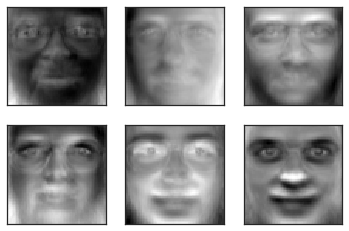

In [16]:
for i, comp in enumerate(pca.components_, 1):
    plt.subplot(2, 3, i)
    plt.imshow(comp.reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

This means by adding up these 6 images, we can get a close approximation of the 400 images in the dataset. 

We can get the coordinates of the 6 components to understand how each face is composed with the components.

In [17]:
faces_r = pca.transform(faces)

In [18]:
faces_r.shape

(400, 6)

`faces_r` is a $400 \times 6$ matrix. Each row corresponds to one face, containing the coordinates of the 6 components. For instance, the coordinates for the first face is

In [19]:
faces_r[0]

array([ 0.81579522, -4.14403414,  2.48326538, -0.90308628,  0.83150158,
        0.88641489])

It seems that the second component (with coordinate 4.14403343) contributes the most to the first face. Let's display them together and see how similar they are:

([], <a list of 0 Text yticklabel objects>)

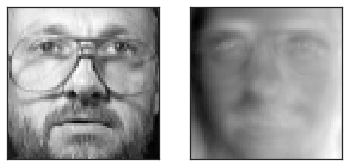

In [20]:
# display the first face image 
plt.subplot(1, 2, 1)
plt.imshow(faces[0].reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')
plt.xticks(())
plt.yticks(())

# display the second component
plt.subplot(1, 2, 2)
plt.imshow(pca.components_[1].reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')
plt.xticks(())
plt.yticks(())

We can display the composition of faces in an "equation" style:

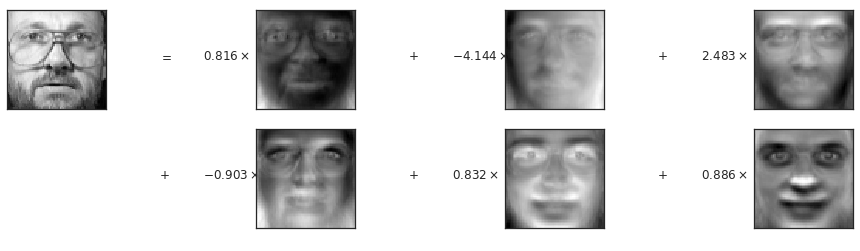

In [21]:
from matplotlib import gridspec

def display_image(ax, image):
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_xticks(())
    ax.set_yticks(())

def display_text(ax, text):
    ax.text(.5, .5, text, size=12)
    ax.axis('off')

face_idx = 0

plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(2, 10, width_ratios=[5,1,1,5,1,1,5,1,1,5])

# display the face
ax = plt.subplot(gs[0])
display_image(ax, faces[face_idx].reshape(64, 64))

# display the equal sign
ax = plt.subplot(gs[1])
display_text(ax, r'$=$')

# display the 6 coordinates
for coord_i, gs_i in enumerate( [2,5,8,12,15,18] ):
    ax = plt.subplot(gs[gs_i])
    display_text( ax, r'$%.3f \times $' % faces_r[face_idx][coord_i] )

# display the 6 components
for comp_i, gs_i in enumerate( [3,6,9,13,16,19] ):
    ax = plt.subplot(gs[gs_i])
    display_image( ax, pca.components_[comp_i].reshape(64, 64)) 

# display the plus sign
for gs_i in [4,7,11,14,17]:
    ax = plt.subplot(gs[gs_i])
    display_text(ax, r'$+$')

We can directly see the results of this addition. 

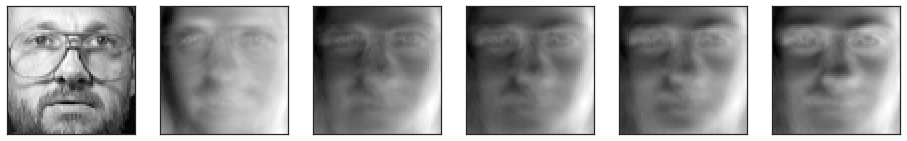

In [22]:
f, axes = plt.subplots(1, 6, figsize=(16,4))
constructed_faces = [-0.816*pca.components_[0] + 4.144*pca.components_[1],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3] + 0.831*pca.components_[4],
                     -0.816*pca.components_[0] + 4.144*pca.components_[1] - 2.483*pca.components_[2] - 0.903*pca.components_[3] + 0.831*pca.components_[4] -0.886*pca.components_[5],
                    ]

# the face that we want to construct. 
display_image(axes[0], faces[0].reshape(64, 64))

for idx, ax in enumerate(axes[1:]):
    display_image(ax, constructed_faces[idx].reshape(64, 64))

It becomes more and more real, although quite far with only several components. 

## Manifold learning

Let's load the digits data. This is a classic dataset of images of handwritten digits. It contains 1797 images with \(8*8=64\) pixels each.

In [23]:
digits = load_digits()
digits.data.shape

(1797, 64)

digits.data stores the images:

In [24]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

and digits.target is the classes (or labels) that the images belong to. There are 10 classes in total.

In [25]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

We can display the first image.

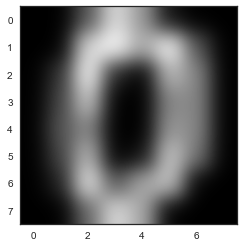

In [26]:
image_shape = (8,8)
plt.imshow( digits.data[0].reshape(image_shape), cmap=plt.cm.gray, interpolation='gaussian' )

To run t-SNE, we want to first reorder the data points according to the handwritten numbers. We can use [np.vstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) and [np.hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html).

In [27]:
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

Then initialize a tsne model. For the meaning of the parameters, see [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

In [28]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

Fit the model on the data.

In [29]:
digits_proj = tsne.fit_transform(X)

Plot the results. Seaborn's [hls](http://seaborn.pydata.org/generated/seaborn.hls_palette.html#seaborn.hls_palette) palatte provides evenly spaced colors in HLS hue space, we can divide it into 10 colors.

In [30]:
palette = np.array(sns.color_palette("hls", 10))

Make a scatter plot of the first component against the second component, with color based on the digits.

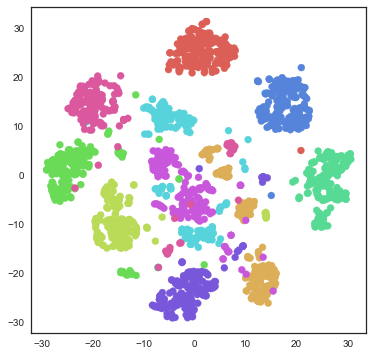

In [31]:
plt.figure(figsize = (6,6))
plt.scatter(digits_proj[:,0], digits_proj[:,1],c=palette[y])

t-SNE clearly seperates the digits into clusters. We can add some text for each cluster, with the place of the text being the center of the cluster. We can use `np.median` to find the centers. To make it more convenient, we can make the code into a function.

In [32]:
def plot_scatter(projection):
    plt.figure(figsize = (6,6))
    plt.scatter(projection[:,0], projection[:,1],c=palette[y])
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(projection[y == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=24)

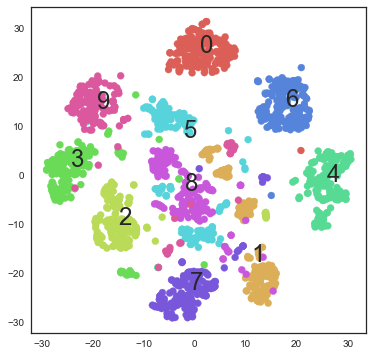

In [33]:
plot_scatter(digits_proj)

We talked about MDS and Isomap in class as two other manifold learning methods. Sklearn also has implementations for this two algorithms: [MDS](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) and [Isomap](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html), and the usage is very similar. Examples for using this methods can be found [here](http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html).

Can you make two more plots using these two methods? You only need to change the model names and call the `plot_scatter` function.

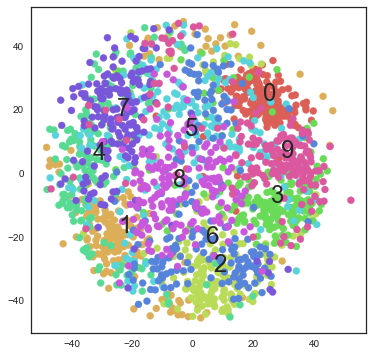

In [34]:
#TODO: plot results from MDS and Isomap
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
digits_proj_mds = clf.fit_transform(X)
plot_scatter(digits_proj_mds)

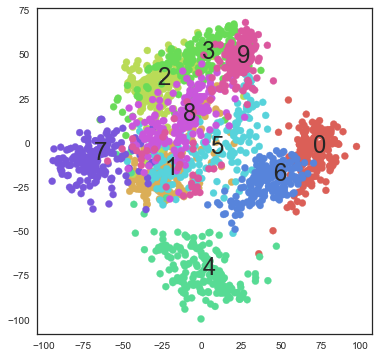

In [35]:
n_neighbors = 30
clf = manifold.Isomap(n_neighbors, n_components=2)
digits_proj_isomap = clf.fit_transform(X)
plot_scatter(digits_proj_isomap)